<a href="https://colab.research.google.com/github/kritikhurana2004/AIMLMonth2023/blob/main/23201__kriti_khurana_MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MINOR PROJECT**

---






# **TASK 1** - Exploratory Data Analysis


**BODY** FAT PREDICTION

## Project Goals

*Handling of missing values.

*visualisation of dataset.

*identification of significant predictors of body fat

*feature scaling or normalization on numerical variables in dataset

*the relationship between body fat percentage and each of the body measurements using scatter plots or line plots with multiple axes.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()


Saving bodyfat.csv to bodyfat (1).csv


In [ ]:
data = pd.read_csv('bodyfat.csv')


Desccription of data

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape



(252, 15)

In [ ]:
data.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [ ]:
data.head(5)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


Q. Are there any missing values or duplicate instances in the dataset? If so, how will you handle them?

In [ ]:
data.isnull().sum() #checking for null values per column

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [ ]:
data.duplicated(keep=False)

0      False
1      False
2      False
3      False
4      False
       ...  
247    False
248    False
249    False
250    False
251    False
Length: 252, dtype: bool

-hence,no missing values in the given dataset

-no duplicate rows present

no. of duplicate instances per column:

In [ ]:
for i in data.columns:
 print(i)
 print( data[i].value_counts())

Density
1.0610    4
1.0414    3
1.0484    3
1.0524    3
1.0462    2
         ..
1.0386    1
1.0800    1
1.0573    1
1.0795    1
1.0271    1
Name: Density, Length: 218, dtype: int64
BodyFat
20.4    4
25.8    3
23.6    3
14.9    3
16.5    3
       ..
31.4    1
18.8    1
18.5    1
13.5    1
31.9    1
Name: BodyFat, Length: 176, dtype: int64
Age
40    17
43    13
42    12
47    11
55    10
41    10
35    10
44     9
49     9
54     8
28     7
27     7
50     7
46     6
26     6
62     5
48     5
39     5
51     5
72     5
56     4
57     4
67     4
64     4
52     4
61     4
23     4
25     4
31     4
34     4
24     4
32     4
65     3
37     3
33     3
58     3
22     2
36     2
38     2
53     2
70     2
30     2
66     2
69     2
29     2
45     2
81     1
60     1
63     1
68     1
74     1
Name: Age, dtype: int64
Weight
179.75    3
168.00    3
172.75    3
167.00    3
177.25    3
         ..
177.75    1
161.25    1
163.75    1
150.25    1
207.50    1
Name: Weight, Length: 197, dtype: 

Q.Can you visualize the distribution of the body fat percentage in the dataset?
Are there any outliers or extreme values? How do the body measurements (age, weight, height, neck circumference, etc.) vary in the dataset? Visualize their distributions using histograms or box plots

<Axes: xlabel='BodyFat', ylabel='count'>

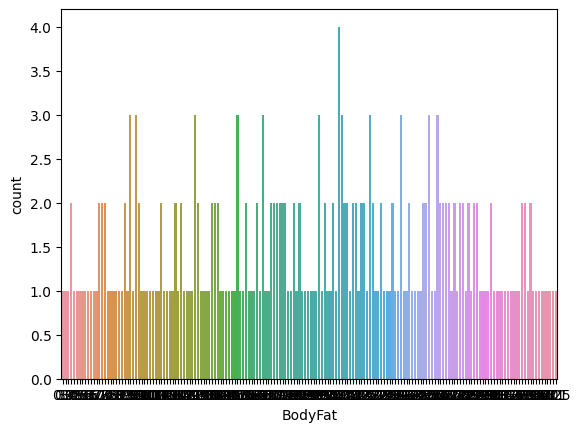

In [ ]:
sns.countplot(x=data['BodyFat'])

In [ ]:
data["BodyFat"].max()

47.5

In [ ]:
data["BodyFat"].min()

0.0

maximum number of people have a body fat percentage of 20.8

maximum body fat percentage recorded is 47.5

minimum body fat percentage recorded is 0

# Q. How do the body measurements (age, weight, height, neck circumference, etc.) vary in the dataset? Visualize their distributions using histograms or box plots

In [ ]:
data.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

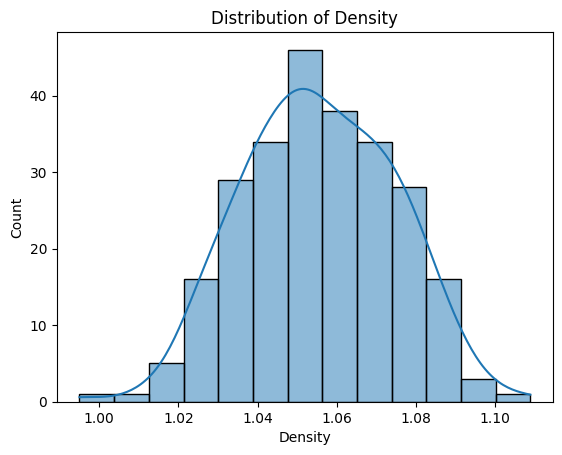

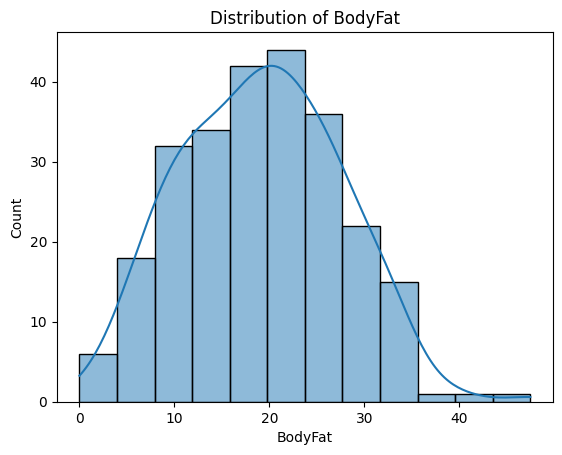

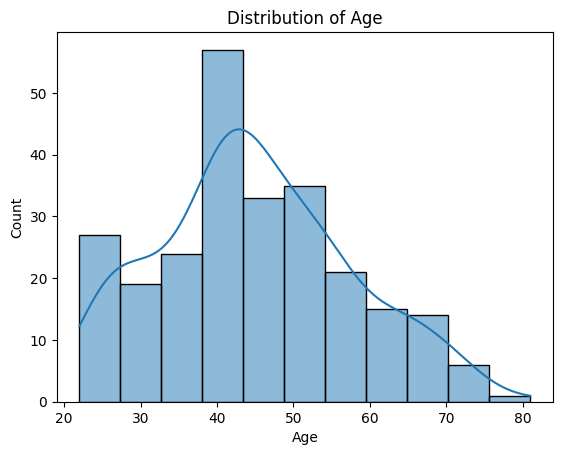

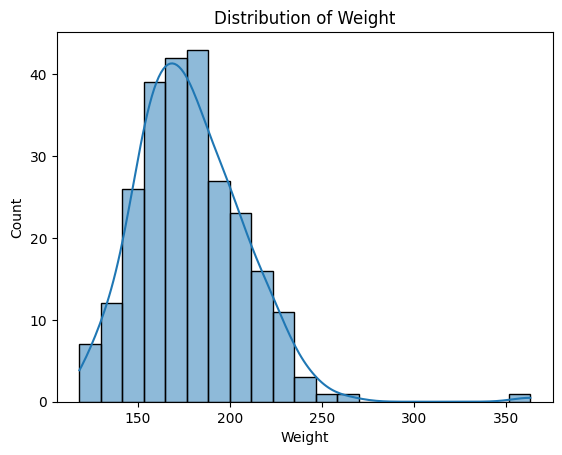

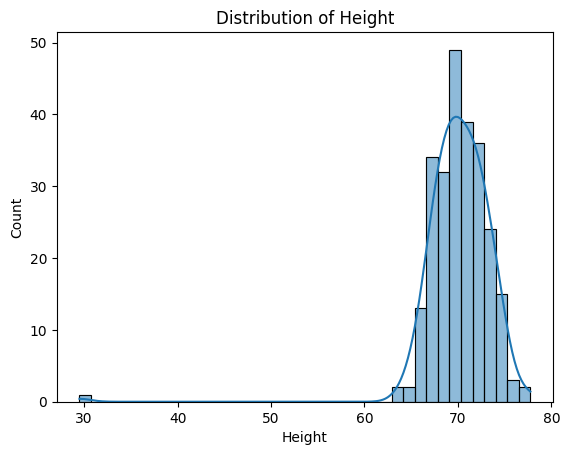

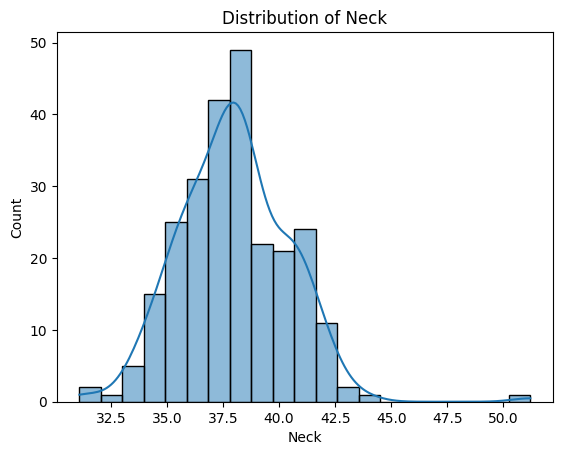

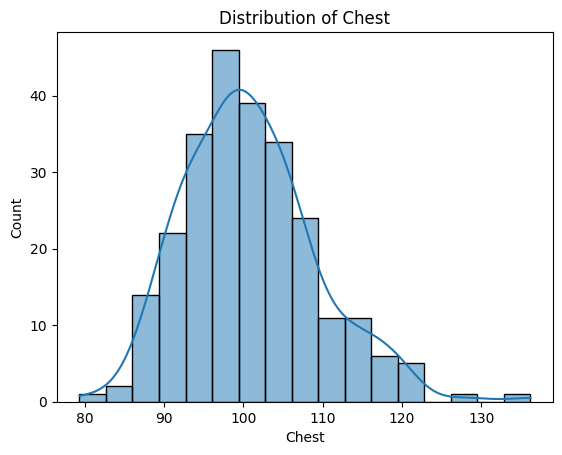

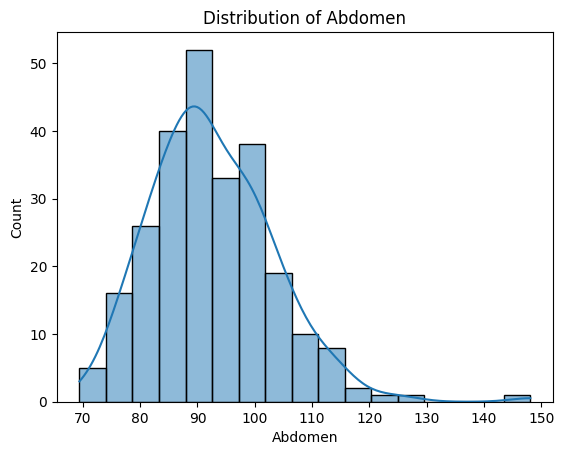

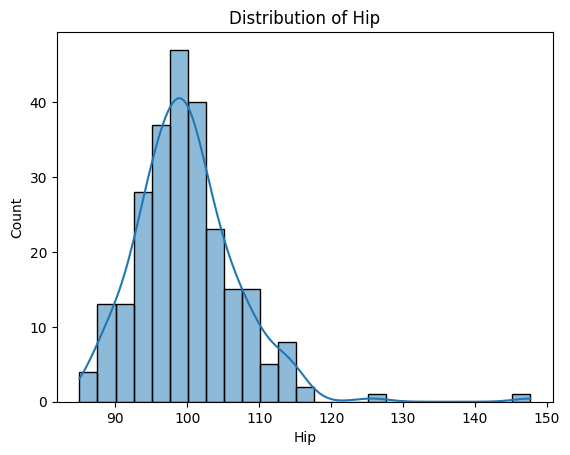

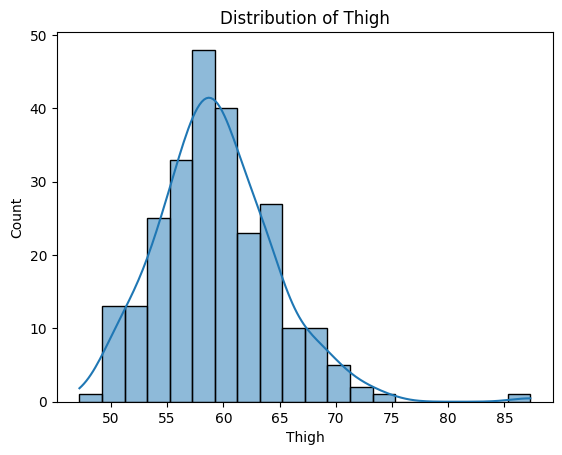

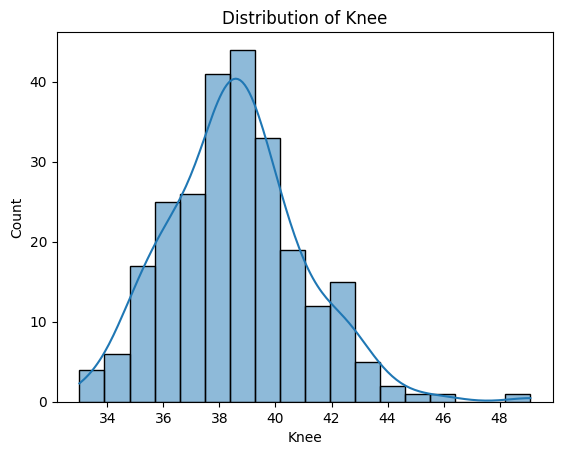

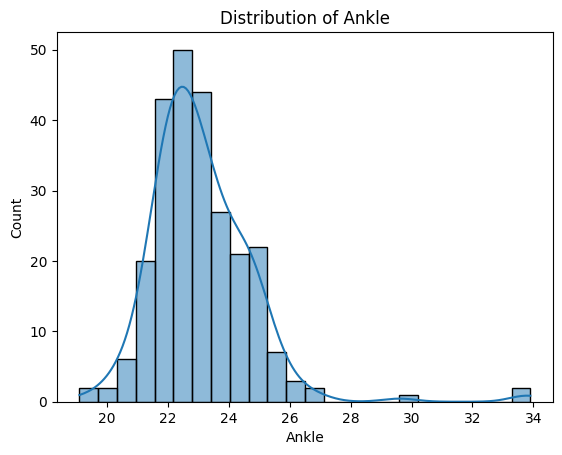

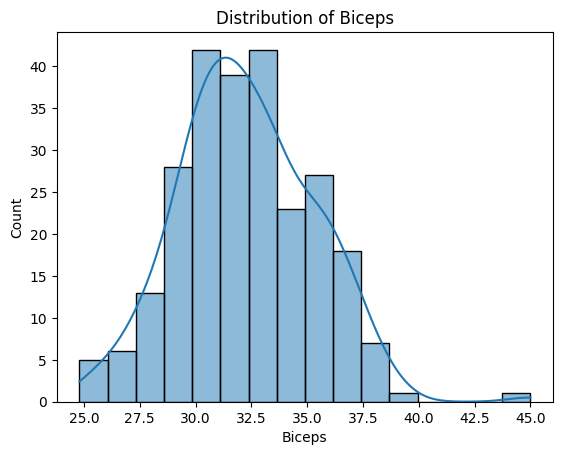

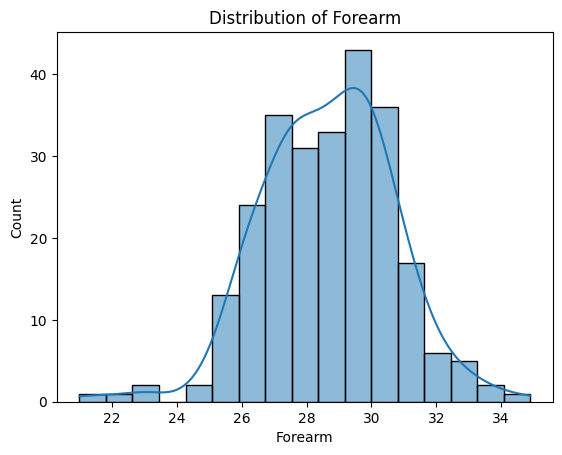

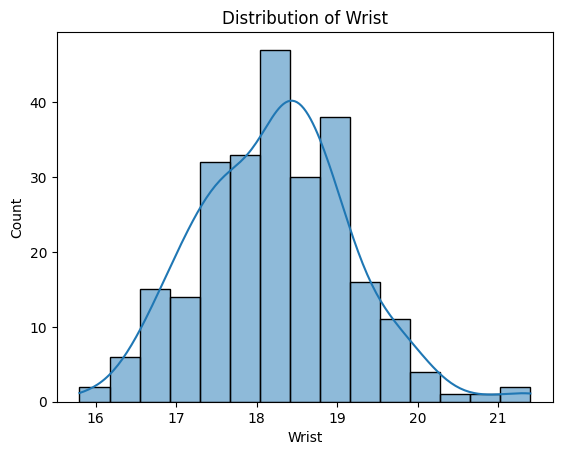

In [ ]:
for feature in data.columns:
    plt.figure()
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

## Q. Can you identify any significant predictors of body fat percentage? Which body measurements have the strongest correlation with body fat percentage?

In [ ]:
features = [ 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']

In [ ]:
correlation=data.corr()['BodyFat'].abs().sort_values(ascending=False)
print(correlation)

BodyFat    1.000000
Density    0.987782
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612414
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.089495
Name: BodyFat, dtype: float64


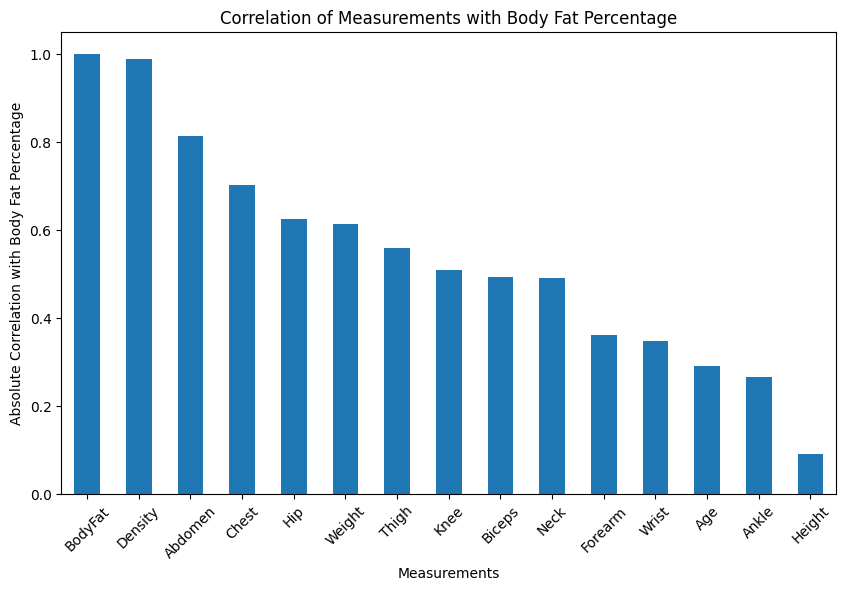

In [ ]:
plt.figure(figsize=(10, 6))
correlation.plot(kind='bar')
plt.xlabel('Measurements')
plt.ylabel('Absolute Correlation with Body Fat Percentage')
plt.title('Correlation of Measurements with Body Fat Percentage')
plt.xticks(rotation=45)
plt.show()

*Abdomen and density measurements have the strongest correlation with body fat percentage

## Q. Can you perform feature scaling or normalization on the numerical variables in the dataset? Which technique would be most suitable?

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']


scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])


## Q. Visualize the relationship between body fat percentage and each of the body measurements using scatter plots or line plots with multiple axes.

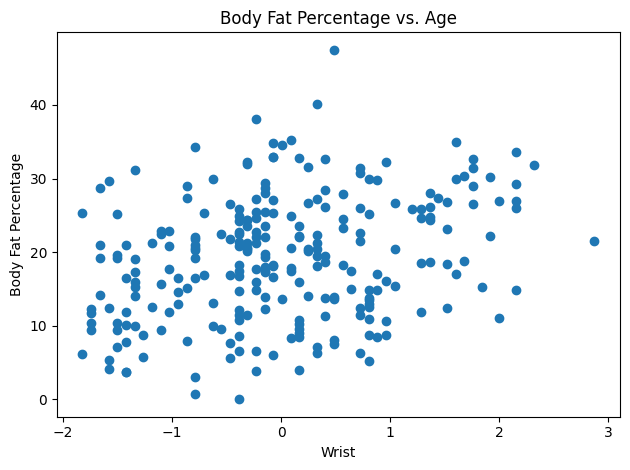

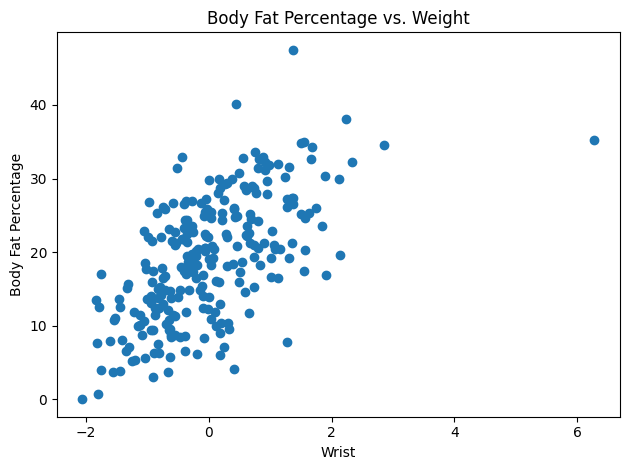

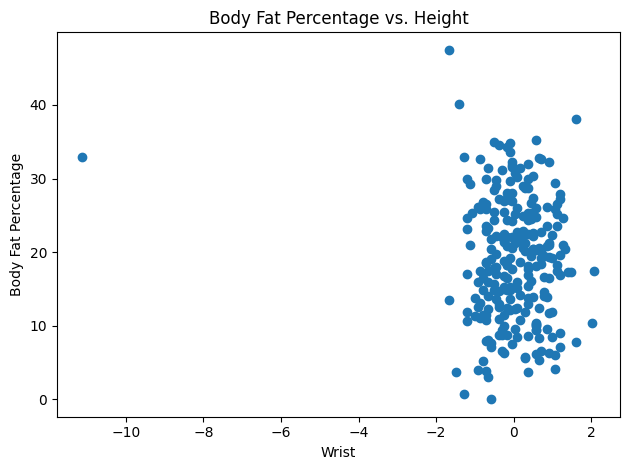

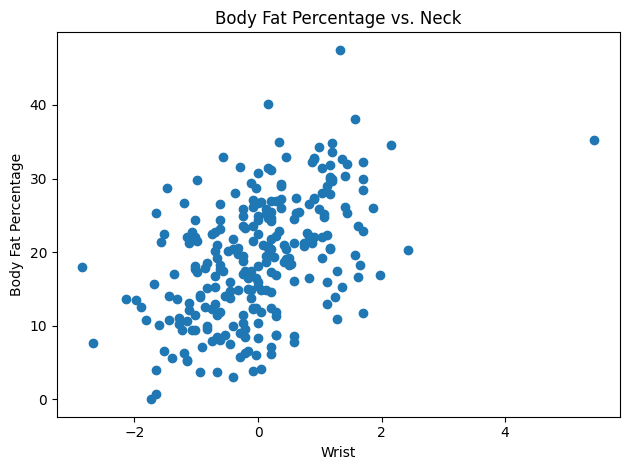

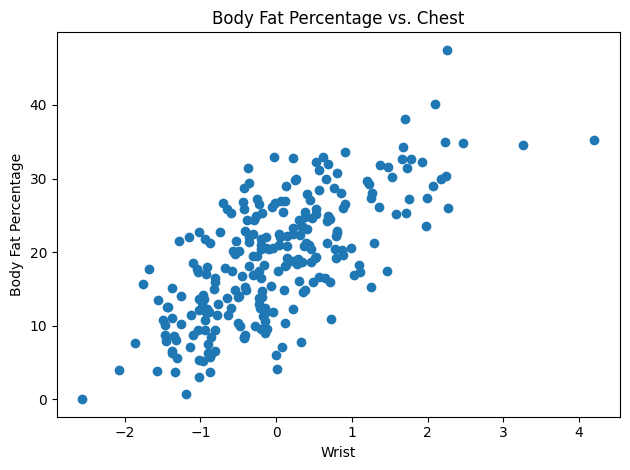

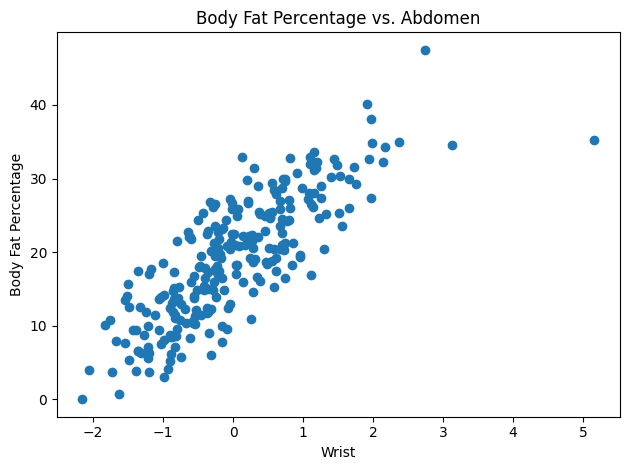

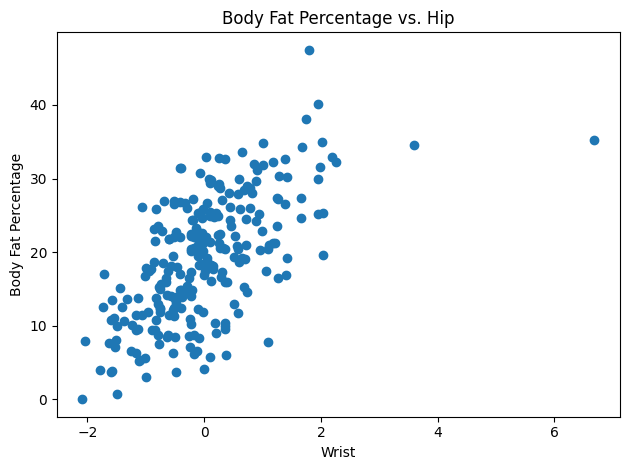

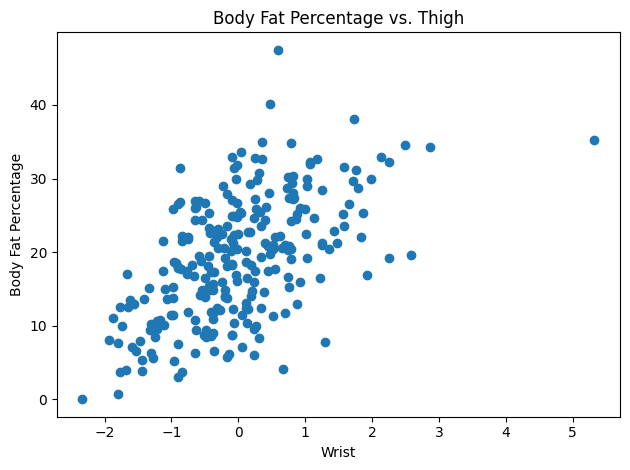

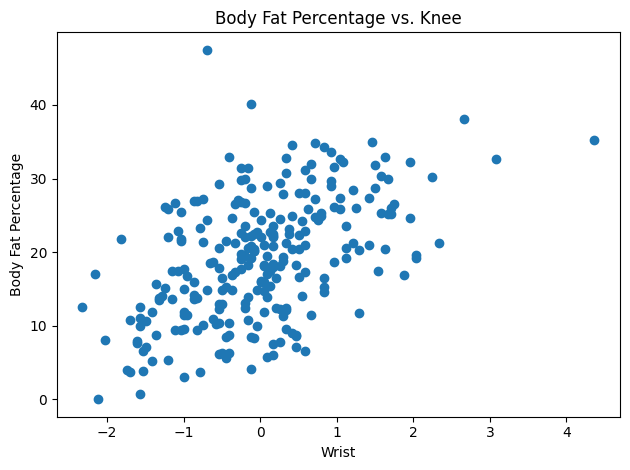

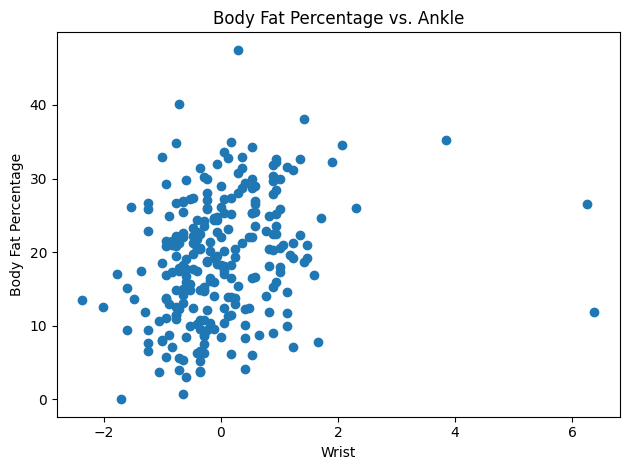

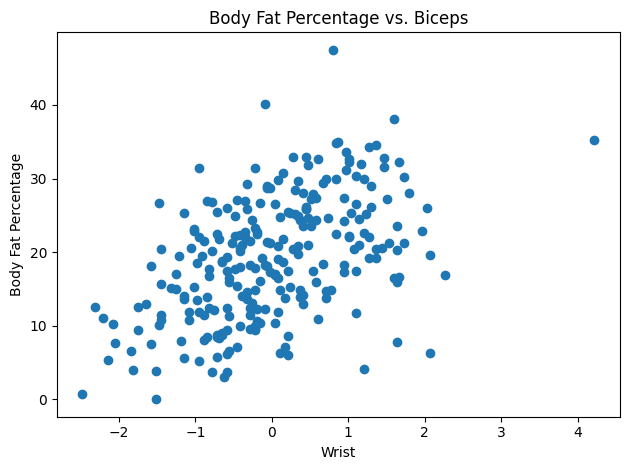

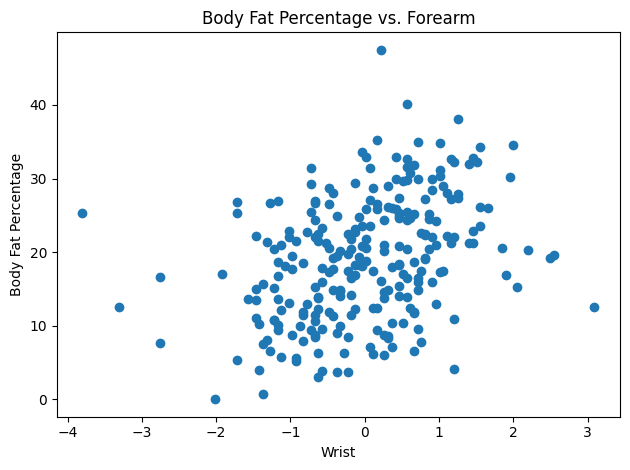

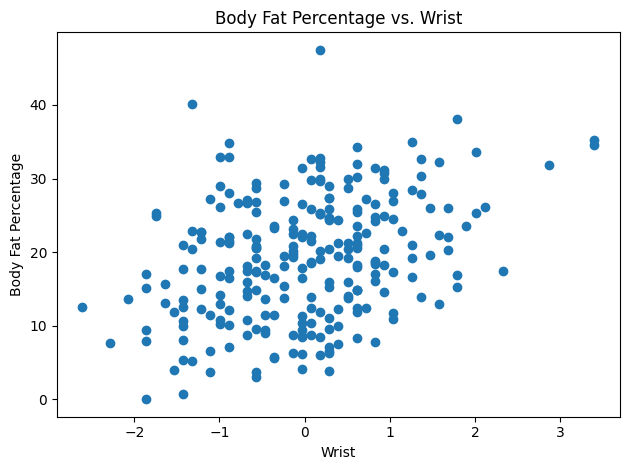

In [ ]:
import matplotlib.pyplot as plt
for i  in features:
    plt.figure()
    plt.scatter(data[i], data['BodyFat'])
    plt.xlabel(feature)
    plt.ylabel('Body Fat Percentage')
    plt.title(f'Body Fat Percentage vs. {i}')
    plt.tight_layout()
    plt.show()

# **TASK 2** - Classification/Regression

Perform following steps on the same dataset which you used for EDA.
> - Data Preprocessing (as per requirement)
> - Feature Engineering
> - Split dataset in train-test (80:20 ratio)
> - Model selection
> - Model training
> - Model evaluation
> - Fine-tune the Model
> - Make predictions

Summarize your model's performance by evaluation metrices



### Data preprocessing

In [ ]:

missing_values = data.isnull().sum()
print(missing_values)
duplicates = data.duplicated()
print(duplicates.sum())
data= data.drop_duplicates()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64
0


### Feature Engineering

In [ ]:
# Create BMI feature
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

In [ ]:
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,1.0708,12.3,-1.740073,-0.841246,-0.656205,-0.738665,-0.918048,-0.683533,-0.755929,-0.077479,-0.536131,-0.710826,-0.090676,-0.626718,-1.212541,-1.953639
1,1.0853,6.1,-1.819583,-0.193462,0.574790,0.209365,-0.858621,-0.887963,-0.168502,-0.134736,-0.536131,0.175947,-0.588143,0.117079,-0.031943,-0.585570
2,1.0414,25.3,-1.819583,-0.849769,-1.066536,-1.645475,-0.597144,-0.432643,-0.098570,0.037035,0.128592,0.530656,-1.151940,-1.717621,-1.749177,-0.747050
3,1.0751,10.4,-1.501543,0.198617,0.574790,-0.244041,0.115976,-0.572026,0.181157,0.132464,-0.536131,-0.178762,0.041982,0.365012,-0.031943,0.601172
4,1.0340,28.7,-1.660563,0.181570,0.301235,-1.480601,-0.418864,0.691719,0.279061,0.724121,1.499585,0.530656,-0.024347,-0.477959,-0.568578,2.000932


###split dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Split Dataset
X = data.drop('BodyFat', axis=1)  # Features
y = data['BodyFat']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  Model Selection

In [ ]:

model = LinearRegression()

###  Model Training

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [ ]:
y_pred = model.predict(X_test)

### Fine-Tune the model

In [ ]:
from sklearn.model_selection import GridSearchCV
# Fine-tune the Model using Grid Search
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train.values, y_train.values)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
best_model = grid_search.best_estimator_

### Make Predictions

In [ ]:
newdata=data.drop("BodyFat",axis=1)

In [ ]:
predictions = best_model.predict(newdata.values)

### Calculate evaluation metrics

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.45948634069238303
Mean Squared Error: 0.3801356721013435
R-squared: 0.9918282148781911


# **Overall, these evaluation metrics suggest that the model performs well in predicting body fat percentages. The low values of MAE and MSE indicate that the model's predictions are generally close to the actual values. Additionally, the high R-squared value suggests that the model captures a significant amount of the variation in the target variable.**